Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

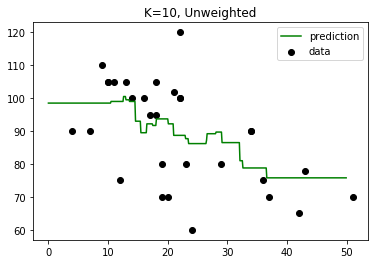

In [2]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

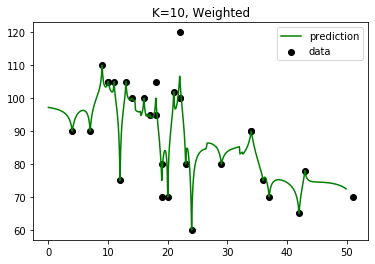

In [3]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [4]:

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(score)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
print(score_w)

Unweighted Accuracy: -0.18 (+/- 0.66)
[-0.02698589 -0.08640354 -0.3672249  -0.70791367  0.26967692]
Weighted Accuracy: 0.11 (+/- 0.94)
[ 0.59952353  0.00116128 -0.00730501 -0.65487951  0.61587523]


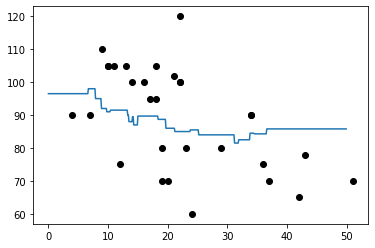

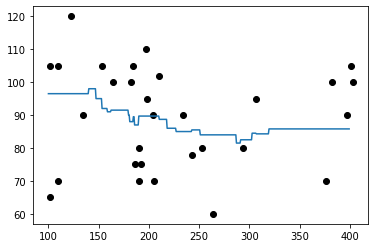

Unweighted Accuracy: -0.11 (+/- 0.29)
[-0.09058914  0.14930814 -0.2134433  -0.07558544 -0.08422727 -0.32600787]


In [5]:
## Your model here.


# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]
D = np.arange(100, 400, (300/500))[:, np.newaxis]

Z = np.c_[T, D]

Y_ = knn.predict(Z)
plt.scatter(X['loudness'], Y, c='k', label='data')
plt.plot(T, Y_)
plt.show()

plt.scatter(X['duration'], Y, c='k', label='data')
plt.plot(D, Y_)
plt.show()



#Reset score
score = cross_val_score(knn, X, Y, cv=6)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(score)




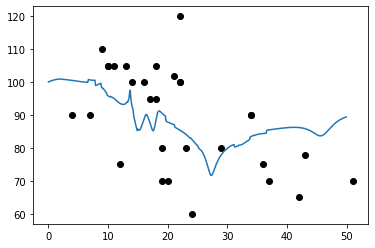

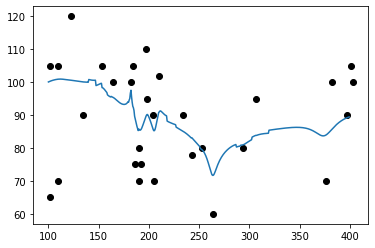

Unweighted Accuracy: -0.00 (+/- 0.34)
[ 0.04504854  0.18762645 -0.11782338  0.23504446 -0.12381251 -0.23693566]
Weighted Accuracy: -0.00 (+/- 0.34)
[ 0.04504854  0.18762645 -0.11782338  0.23504446 -0.12381251 -0.23693566]


In [7]:
## Your model here.


# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]
D = np.arange(100, 400, (300/500))[:, np.newaxis]

Z = np.c_[T, D]

Y_ = knn_w.predict(Z)
plt.scatter(X['loudness'], Y, c='k', label='data')
plt.plot(T, Y_)
plt.show()


plt.scatter(X['duration'], Y, c='k', label='data')
plt.plot(D, Y_)
plt.show()


#Reset score
score_w = cross_val_score(knn_w, X, Y, cv=6)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
print(score_w)
score_w = cross_val_score(knn_w, X, Y, cv=6)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
print(score_w)